## Dever 1
*Thiago Laidler Vidal Cunha*


Astroestatística ON 2024.2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import math
import scipy.stats as stats
from tqdm import tqdm 
import time
import multiprocessing as mp
from scipy.stats import norm
from scipy.stats import poisson
from scipy.optimize import curve_fit
import random
import scipy.special as sp
from scipy.special import gamma
from scipy.integrate import quad

In [39]:
def gaussiana(x, a, x0, sigma):
    return a * np.exp(-((x - x0)**2) / (2 * sigma**2))

**1)**

Tome uma distribuição normal com média igual a 100 e variância igual a 10, ou seja, N (100, √10). Produza N amostras com 8 pontos de dados cada, assumindo tal distribuição, e prove o teorema do limite central usando essas amostras.

In [4]:
def TCL_analysis(data_series, n_samples = 100000 , sample_size = 2):
    # Simulação da distribuição de médias amostrais
    nova_distribuicao = np.array([])

    for i in range(n_samples):
        indices = np.random.randint(0, len(data_series), sample_size)
        nova_distribuicao = np.append(nova_distribuicao, data_series[indices].mean())
    # Visualização da distribuição
    plt.hist(nova_distribuicao, color='gray', bins='auto')
    plt.ylabel('Frequência', fontsize=15)
    plt.xlabel('Valor Médio', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.axvline(np.mean(nova_distribuicao), color='r', ls='--', lw=2, label='Média')
    plt.axvline(np.mean(nova_distribuicao) - np.std(nova_distribuicao), color='k', ls='--', lw=2, label='Desvio padrão')
    plt.axvline(np.mean(nova_distribuicao) + np.std(nova_distribuicao), color='k', ls='--', lw=2)
    plt.legend()
    plt.show()

    return np.mean(nova_distribuicao), np.mean(nova_distribuicao) - 3*np.std(nova_distribuicao), np.mean(nova_distribuicao) + 3*np.std(nova_distribuicao)

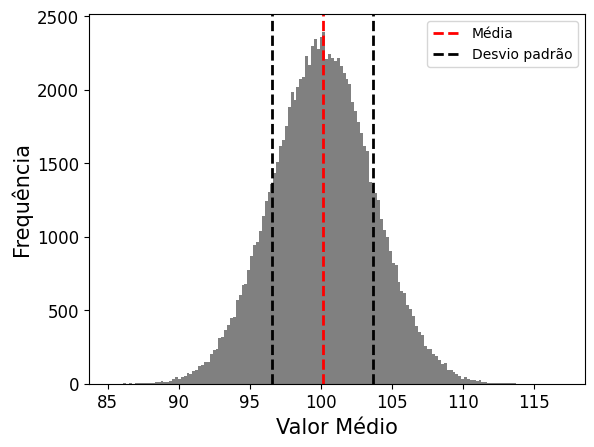

(100.1135425821476, 89.52624227842836, 110.70084288586685)

In [5]:
TCL_analysis(data_series=np.random.normal(100, 10, 10000), sample_size=8)

**2)**

Analisar dados de DR12 quasar (QSO) catalogue from the Sloan Digital Sky Survey (SDSS), que contém 297,301 QSOs identificados.

> Dados tirados de: https://www.sdss4.org/dr17/algorithms/boss-dr12-quasar-catalog/

In [6]:
from astropy.io import fits
fx = fits.open('DR12Q.fits', memmap=True)
d = fx[1].data

### HDU1: DR12Q BAL properties

EXTNAME="DR12Q_BAL" with a binary FITS table with the following columns:

 - Data Table Columns

| Column Name   | Type       | Units | Description                       |
|---------------|------------|-------|-----------------------------------|
| SDSS_NAME     | char[18]   | -     | SDSS-DR12 designation             |
| RA            | float64    | deg   | RA (J2000)                        |
| DEC           | float64    | deg   | DEC (J2000)                       |
| THING_ID      | int32      | -     | Unique identifier                 |
| PLATE         | int32      | -     | Plate number                      |
| MJD           | int32      | -     | Spectroscopic MJD                 |
| FIBERID       | int32      | -     | Fiber number                      |
| Z_VI          | float64    | -     | Visual inspection redshift        |
| Z_PIPE        | float64    | -     | BOSS pipeline redshift            |
| ERR_ZPIPE     | float64    | -     | Error on pipeline redshift        |
| ZWARNING      | int32      | -     | ZWarning flag                     |
| Z_PCA         | float64    | -     | PCA redshift                      |
| ERR_ZPCA      | float64    | -     | Error on PCA redshift             |
| SDSS_MORPHO   | int16      | -     | Morphology flag                   |
| BOSS_TARGET1  | int64      | -     | Main survey TS flag               |
...

In [7]:
redshift_data = fx[1].data['Z_PIPE'] #Z_PIPE: Redshift do pipeline BOSS

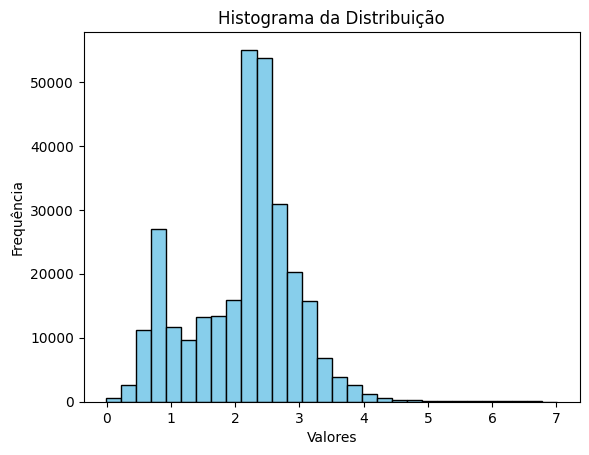

In [8]:
# Plotando o histograma
plt.hist(redshift_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma da Distribuição')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

Média (mu): 2.1371426582336426
Desvio Padrão (std): 0.821794867515564


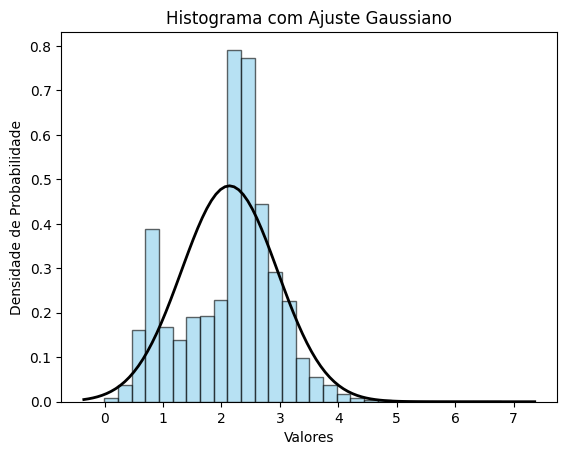

In [9]:
# Ajuste do modelo gaussiano
mu, std = norm.fit(redshift_data)

# Exibindo a média e desvio padrão ajustados
print(f"Média (mu): {mu}")
print(f"Desvio Padrão (std): {std}")

# Plotando o histograma e a curva de ajuste
plt.hist(redshift_data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Curva Gaussiana ajustada
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Histograma com Ajuste Gaussiano")
plt.xlabel("Valores")
plt.ylabel("Densidade de Probabilidade")
plt.show()

Parâmetros da função Gamma ajustada: k = 2.14, theta = 0.97


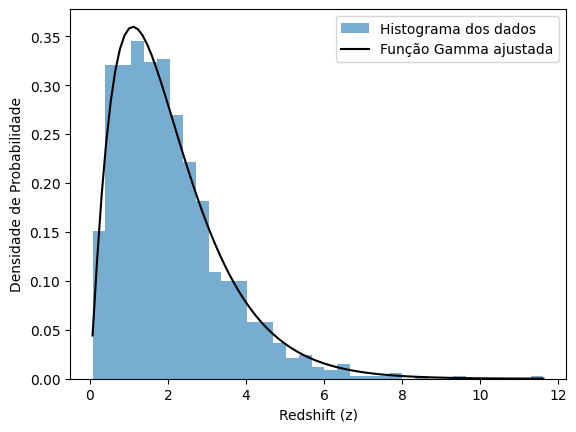

In [10]:
# Função Gamma
def gamma_func(z, k, theta):
    return (z**(k-1) * np.exp(-z/theta)) / (theta**k * gamma(k))

# Dados de exemplo para redshift
redshift_data = np.random.gamma(2, 1, 1000)  # exemplo de dados

# Calcula o histograma dos dados
hist, bin_edges = np.histogram(redshift_data, bins='auto', density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # centra os bins

# Ajusta a função Gamma aos dados do histograma
popt, _ = curve_fit(gamma_func, bin_centers, hist, p0=[2, 1])  # valores iniciais k=2, theta=1

# Obtém os melhores valores de k e theta
k_fit, theta_fit = popt
print(f"Parâmetros da função Gamma ajustada: k = {k_fit:.2f}, theta = {theta_fit:.2f}")

# Plota o histograma e a função Gamma ajustada
plt.hist(redshift_data, bins='auto', density=True, alpha=0.6, label='Histograma dos dados')
z_range = np.linspace(min(redshift_data), max(redshift_data), 100)
plt.plot(z_range, gamma_func(z_range, k_fit, theta_fit), label='Função Gamma ajustada', color='black')
plt.xlabel('Redshift (z)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

**3)**

Considere a compilação de Supernovas Tipo Ia (SN) nomeada Union2.1 enviada por e-mail. Considere também que as colunas do arquivo representam o nome da SN, redshift, módulo de distância e a incerteza do módulo de distância, respectivamente. Você pode negligenciar a última coluna por enquanto.

### a)

Começamos com a fórmula dada: $µ = 5 log d - 5$

Sabemos que 1 Mpc = 10^6 pc. Portanto, podemos substituir d na fórmula por dL * 10^6: $µ = 5 log (dL * 10^6) - 5$

Usando as propriedades dos logaritmos, podemos simplificar a equação: $µ = 5 (log (dL) + log 10^6) - 5$

Como log 10^6 = 6, a equação se torna: $µ = 5 log (dL) + 30 - 5$

Finalmente, chegamos à fórmula: $µ = 5 log (dL) + 25$

In [18]:
Union21 = pd.DataFrame(np.genfromtxt("SCPUnion2.1_mu_vs_z.txt", comments='#', dtype=None, encoding=None))
Union21.columns = ["name", "redshift", "distance_mod", "distance_std", "ignore"]
Union21

,name,redshift,distance_mod,distance_std,ignore
0,1993ah,0.028488,35.346583,0.223906,0.128419
1,1993ag,0.050043,36.682368,0.166829,0.128419
2,1993o,0.052926,36.817691,0.155756,0.128419
3,1993b,0.070086,37.446737,0.158467,0.128419
4,1992bs,0.062668,37.483409,0.156099,0.128419
...,...,...,...,...,...
575,D-000,1.017000,44.293971,0.171046,0.000015
576,D-006,1.315000,44.971358,0.187509,0.551672
577,P-009,0.821000,43.640939,0.194014,0.551672
578,R-012,1.215000,45.246521,0.560317,0.000148


In [ ]:
# Constantes
c = 3e5  # Velocidade da luz em km/s
H0 = 70  # Constante de Hubble em km/s/Mpc

z_data = Union21['redshift']  # Redshift
mu_data = Union21['distance_mod']   # Módulo de distância observado # µ = m - M = 5 log d - 5
sigma_mu = Union21['distance_std']  # Incerteza do módulo de distância

### b) e c)

In [28]:
# Função para calcular a integral na equação da distância de luminosidade
def integrando(z, Omega_m):
    return 1 / np.sqrt(Omega_m * (1 + z)**3 + (1 - Omega_m))

def dist_luminosidade(z, Omega_m):
    resultados = []
    for z_i in z:  # Iterar sobre cada valor de redshift
        integral, _ = quad(integrando, 0, z_i, args=(Omega_m,))
        resultados.append(c / H0 * (1 + z_i) * integral)
    return np.array(resultados)  # Retornar um array NumPy

# Função para calcular o módulo de distância do modelo
def mu_modelo(z, Omega_m):
    d_L = dist_luminosidade(z, Omega_m)
    return 5 * np.log10(d_L) + 25

# Valores de Omega_m para testar
Omega_m_valores = [0.20, 0.30, 0.40]

# Calcular o χ² para cada valor de Omega_m
for Omega_m in Omega_m_valores:
    mu_modelo_valores = mu_modelo(z_data, Omega_m)
    chi2 = np.sum(((mu_modelo_valores - mu_data) / sigma_mu)**2)
    # Calcular o número de graus de liberdade
    graus_de_liberdade = len(z_data) - 1  # Número de pontos de dados - número de parâmetros (Omega_m)
    
    # Calcular o χ² reduzido
    chi2_reduzido = chi2 / graus_de_liberdade
    
    print(f"Omega_m = {Omega_m:.2f}, χ² = {chi2:.2f}, χ²_ν = {chi2_reduzido:.2f}")

Omega_m = 0.20, χ² = 602.97, χ²_ν = 1.04
Omega_m = 0.30, χ² = 564.53, χ²_ν = 0.98
Omega_m = 0.40, χ² = 633.80, χ²_ν = 1.09


O χ² chi_quadrado é uma medida da qualidade do ajuste, levando em consideração o número de graus de liberdade. Um valor de χ² próximo de 1 indica um bom ajuste. Valores muito maiores que 1 podem indicar um ajuste ruim (subajuste), enquanto valores muito menores que 1 podem indicar um ajuste excessivo (sobreajuste/overfit).
Ao analisar os valores de χ² obtidos para cada valor de Ω, podemos determinar qual valor fornece o melhor ajuste aos dados, considerando a penalidade pelo número de parâmetros no modelo. O valor de Ωcom o χ² mais próximo de 1 será o que melhor se ajusta aos dados (no caso, o melhor foi Ω=0.3).

### d)

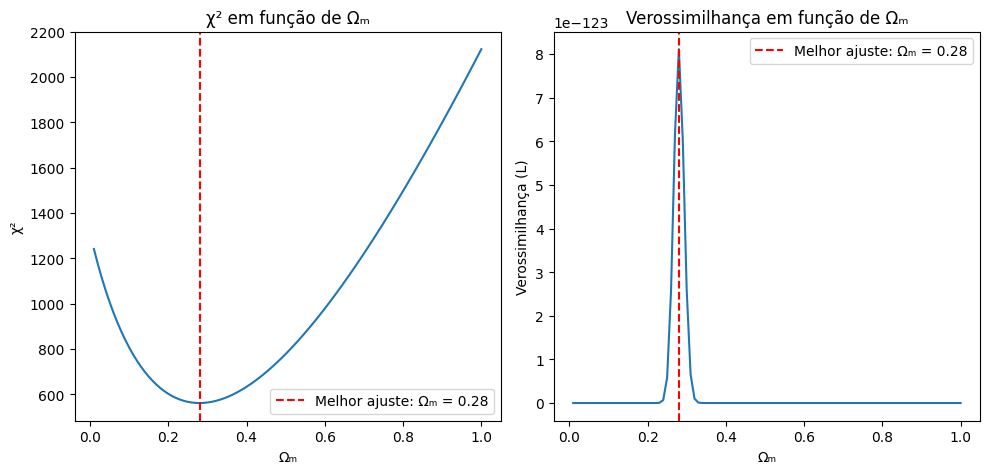

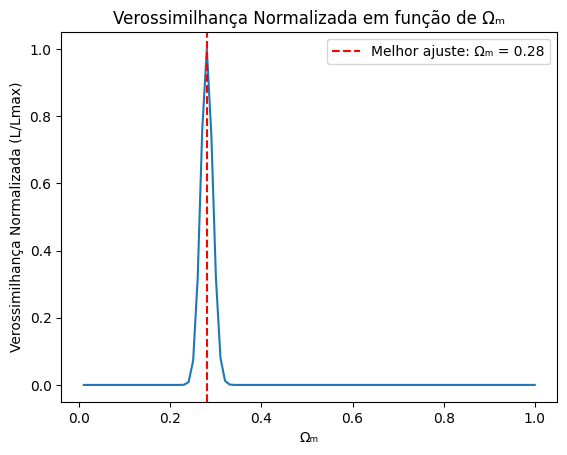

In [ ]:
# Intervalo de valores de Omega_m para testar
Omega_m_valores = np.linspace(0.01, 1, 100)  # Testar valores de 0.01 a 1

# Listas para armazenar os valores de chi2 e verossimilhança
chi2_valores = []
verossimilhanca_valores = []

# Calcular o χ² e a verossimilhança para cada valor de Omega_m
for Omega_m in Omega_m_valores:
    mu_modelo_valores = mu_modelo(z_data, Omega_m)
    chi2 = np.sum(((mu_modelo_valores - mu_data) / sigma_mu)**2)
    chi2_valores.append(chi2)
    
    # Calcular a verossimilhança
    verossimilhanca = np.exp(-chi2 / 2)
    verossimilhanca_valores.append(verossimilhanca)

# Encontrar o índice do menor valor de chi2 (melhor ajuste)
indice_min_chi2 = np.argmin(chi2_valores)
melhor_Omega_m = Omega_m_valores[indice_min_chi2]

# Plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(Omega_m_valores, chi2_valores)
plt.xlabel("Ωₘ")
plt.ylabel("χ²")
plt.title("χ² em função de Ωₘ")
plt.axvline(melhor_Omega_m, color='red', linestyle='--', label=f"Melhor ajuste: Ωₘ = {melhor_Omega_m:.2f}")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Omega_m_valores, verossimilhanca_valores)
plt.xlabel("Ωₘ")
plt.ylabel("Verossimilhança (L)")
plt.title("Verossimilhança em função de Ωₘ")
plt.axvline(melhor_Omega_m, color='red', linestyle='--', label=f"Melhor ajuste: Ωₘ = {melhor_Omega_m:.2f}")
plt.legend()

plt.tight_layout()
plt.show()

verossimilhanca_normalizada = verossimilhanca_valores / np.max(verossimilhanca_valores)
plt.figure()
plt.plot(Omega_m_valores, verossimilhanca_normalizada)
plt.xlabel("Ωₘ")
plt.ylabel("Verossimilhança Normalizada (L/Lmax)")
plt.title("Verossimilhança Normalizada em função de Ωₘ")
plt.axvline(melhor_Omega_m, color='red', linestyle='--', label=f"Melhor ajuste: Ωₘ = {melhor_Omega_m:.2f}")
plt.legend()
plt.show()

A verossimilhança (L), como explicada na questão, é calculada a partir do χ², que mede o quão bem o modelo se ajusta aos dados. A equação (4) mostra a relação entre a verossimilhança e o χ²:
$L ∝ exp (−χ2/2)$

Valores altos de verossimilhança indicam um bom ajuste do modelo aos dados. Isso significa que os valores previstos pelo modelo estão próximos aos valores observados.
●
Valores baixos de verossimilhança indicam um ajuste ruim do modelo aos dados.

Ao plotar L/L<sub>max</sub>, normalizamos a verossimilhança pelo seu valor máximo. Isso permite visualizar a forma da função de verossimilhança de forma mais clara, destacando a região de maior probabilidade para o parâmetro Ω<sub>m</sub>. O pico da curva corresponde ao melhor valor de ajuste para Ω<sub>m</sub>. A largura da curva fornece uma indicação da incerteza associada ao parâmetro, com curvas mais largas indicando maior incerteza.

### e)

Parâmetros ajustados:
Amplitude (a) = 1.000
Centro (x0) = 0.280
Largura (sigma) = 0.013


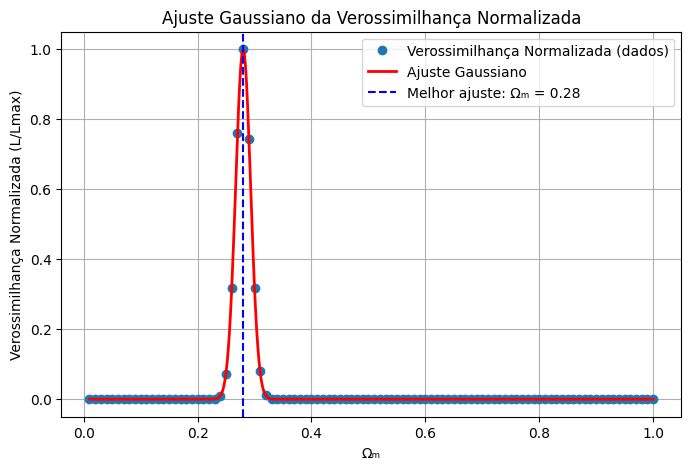

In [ ]:
# Ajustar a gaussiana aos dados
params_iniciais = [1, melhor_Omega_m, 0.1]  # Chute inicial: altura = 1, centro = melhor_Omega_m, largura = 0.1
parametros, covariancia = curve_fit(gaussiana, Omega_m_valores, verossimilhanca_normalizada, p0=params_iniciais)

# Parâmetros ajustados
a_ajustado, x0_ajustado, sigma_ajustado = parametros
print(f"Parâmetros ajustados:\nAmplitude (a) = {a_ajustado:.3f}\nCentro (x0) = {x0_ajustado:.3f}\nLargura (sigma) = {sigma_ajustado:.3f}")

Omega_m_suave = np.linspace(Omega_m_valores.min(), Omega_m_valores.max(), 500)
verossimilhanca_gaussiana = gaussiana(Omega_m_suave, *parametros)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(Omega_m_valores, verossimilhanca_normalizada, label="Verossimilhança Normalizada (dados)", marker="o", linestyle="")
plt.plot(Omega_m_suave, verossimilhanca_gaussiana, label="Ajuste Gaussiano", color="red", linewidth=2)
plt.axvline(melhor_Omega_m, color='blue', linestyle='--', label=f"Melhor ajuste: Ωₘ = {melhor_Omega_m:.2f}")
plt.xlabel("Ωₘ")
plt.ylabel("Verossimilhança Normalizada (L/Lmax)")
plt.title("Ajuste Gaussiano da Verossimilhança Normalizada")
plt.legend()
plt.grid()
plt.show()

## 4)

In [44]:
AGN_count = np.loadtxt('data_hmwrk01_ex4.txt')

In [45]:
# Função de bootstrap
def bootstrap(data, N):
    bootstrap_means = []
    for _ in range(N):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(sample))
    return np.array(bootstrap_means)

N = 100, Média das amostras bootstrap: 32.29, Desvio padrão: 0.84
N = 1000, Média das amostras bootstrap: 32.16, Desvio padrão: 0.86
N = 10000, Média das amostras bootstrap: 32.17, Desvio padrão: 0.85


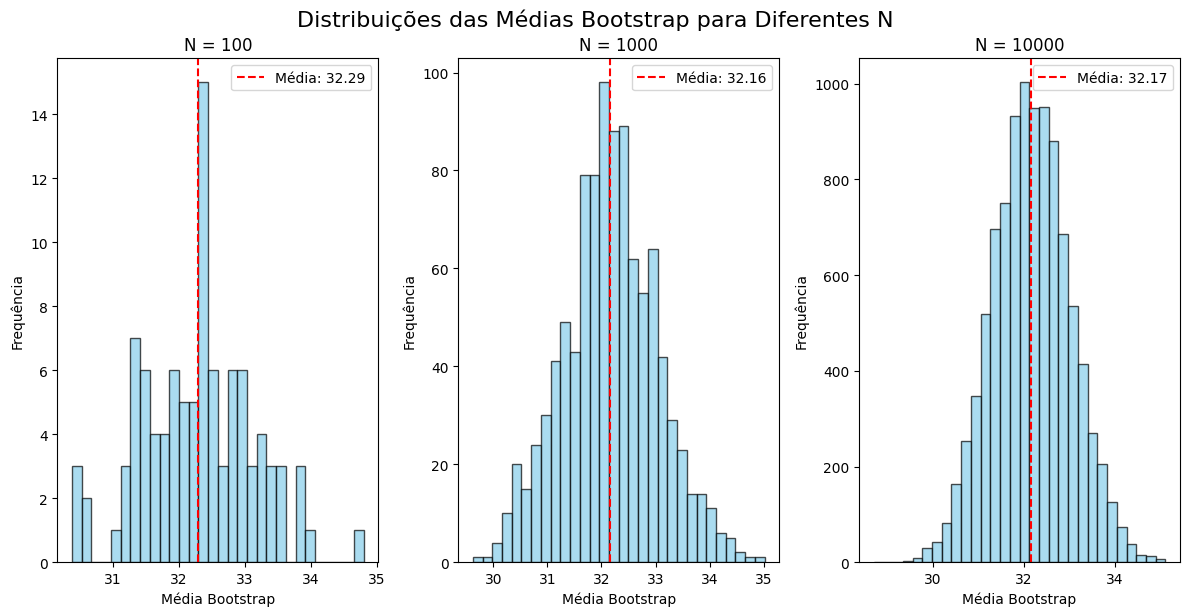

In [46]:
# Valores de N
N_values = [100, 1000, 10000]

# Realizar o bootstrap e calcular estatísticas
results = {}
for N in N_values:
    bootstrap_means = bootstrap(AGN_count, N)
    mean = np.mean(bootstrap_means)
    std = np.std(bootstrap_means)
    results[N] = {
        "means": bootstrap_means,
        "mean": mean,
        "std": std
    }
    print(f"N = {N}, Média das amostras bootstrap: {mean:.2f}, Desvio padrão: {std:.2f}")

# Plotar os resultados
plt.figure(figsize=(12, 6))

for i, N in enumerate(N_values, 1):
    plt.subplot(1, 3, i)
    plt.hist(results[N]["means"], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(results[N]["mean"], color='red', linestyle='--', label=f"Média: {results[N]['mean']:.2f}")
    plt.title(f"N = {N}")
    plt.xlabel("Média Bootstrap")
    plt.ylabel("Frequência")
    plt.legend()

plt.tight_layout()
plt.suptitle("Distribuições das Médias Bootstrap para Diferentes N", fontsize=16, y=1.02)
plt.show()

#